In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Smartphone.csv')
df

,Unnamed: 0,Product_Review,Ratings
0,0,Camera : Great. No words for it's outstanding ...,4.0
1,1,This is a very good budget phone from Samsung ...,4.0
2,2,Screen (5/5)Camera (3.8/5)Battery (4.5/5)RAM m...,4.0
3,3,"I have always liked black, this time by mistak...",4.0
4,4,IF YOU TALK ABOUT LIKE ... THEN I SAY ... BATT...,4.0
...,...,...,...
19995,19995,Been using the phone for a while now and it's ...,5.0
19996,19996,Camera should be improved. Otherwise phone is ...,4.0
19997,19997,But RAM plus not available in 4gb varient,4.0
19998,19998,Thank you Amazon ☺️Product is good 👍Dilivery B...,4.0


In [3]:
# Dropping unnecssary index column Unnamed:0 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.dtypes

Product_Review     object
Ratings           float64
dtype: object

In [5]:
#Checking for missing data
df.isnull().sum()

Product_Review    550
Ratings             0
dtype: int64

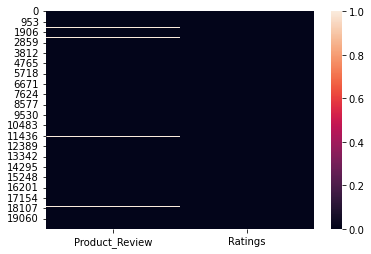

In [6]:
sns.heatmap(df.isnull());

In [7]:
df['Product_Review'].fillna('Review Not Available',inplace=True)

In [8]:
df.isnull().sum()

Product_Review    0
Ratings           0
dtype: int64

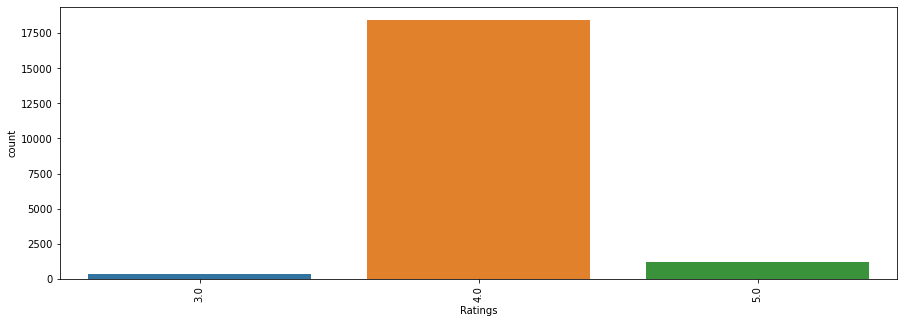

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(df['Ratings'])
plt.xticks(rotation=90)
plt.show()

In [10]:
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [11]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
df['Product_Review'] = df['Product_Review'].replace('\n',' ')

In [13]:
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [14]:
df['Product_Review'] = df['Product_Review'].apply(clean_comments)
df['Product_Review'].head()

0    camera great word outstanding performance pric...
1    good budget phone samsung galaxy series using ...
2    screen camera battery ram management processor...
3    always liked black time mistake placed blue lo...
4    talk like say battery performance camera quali...
Name: Product_Review, dtype: object

In [15]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Product_Review,Ratings
0,"[camera, great, word, outstanding, performance...",4.0
1,"[good, budget, phone, samsung, galaxy, series,...",4.0
2,"[screen, camera, battery, ram, management, pro...",4.0
3,"[always, liked, black, time, mistake, placed, ...",4.0
4,"[talk, like, say, battery, performance, camera...",4.0


In [16]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [17]:
#Processing review with above Function
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

20000


[['camera',
  'great',
  'word',
  'outstand',
  'perform',
  'price',
  'even',
  'beat',
  'smartphon',
  'upto',
  'camera',
  'depart',
  'batteri',
  'min',
  'charg',
  'get',
  'discharg',
  'use',
  'quora',
  'twitter',
  'pininterest',
  'min',
  'discharg',
  'use',
  'upto',
  'game',
  'app',
  'decent',
  'batteri',
  'rememb',
  'display',
  'amol',
  'full',
  'high',
  'ppi',
  'consum',
  'batteri',
  'general',
  'batteri',
  'stay',
  'one',
  'half',
  'day',
  'use',
  'throughout',
  'day',
  'without',
  'game',
  'display',
  'colour',
  'amol',
  'saw',
  'colour',
  'line',
  'pass',
  'horizont',
  'display',
  'hope',
  'occur',
  'edit',
  'happen',
  'remov',
  'permiss',
  'system',
  'app',
  'never',
  'happen',
  'tip',
  'tri',
  'keep',
  'bright',
  'low',
  'prefer',
  'dark',
  'mode',
  'screen',
  'use',
  'dark',
  'theme',
  'app',
  'avoid',
  'ghost',
  'screen',
  'burn',
  'far',
  'futur',
  'amol',
  'display',
  'samsung',
  'mobil',
 

In [18]:
df['clean_review']=processed_review  
df.head()

,Product_Review,Ratings,clean_review
0,"[camera, great, word, outstanding, performance...",4.0,"[camera, great, word, outstand, perform, price..."
1,"[good, budget, phone, samsung, galaxy, series,...",4.0,"[good, budget, phone, samsung, galaxi, seri, u..."
2,"[screen, camera, battery, ram, management, pro...",4.0,"[screen, camera, batteri, ram, manag, processo..."
3,"[always, liked, black, time, mistake, placed, ...",4.0,"[alway, like, black, time, mistak, place, blue..."
4,"[talk, like, say, battery, performance, camera...",4.0,"[talk, like, say, batteri, perform, camera, qu..."


In [19]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_Review,Ratings,clean_review
0,camera great word outstand perform price even ...,4.0,"[camera, great, word, outstand, perform, price..."
1,good budget phone samsung galaxi seri use phon...,4.0,"[good, budget, phone, samsung, galaxi, seri, u..."
2,screen camera batteri ram manag processor buy ...,4.0,"[screen, camera, batteri, ram, manag, processo..."
3,alway like black time mistak place blue look d...,4.0,"[alway, like, black, time, mistak, place, blue..."
4,talk like say batteri perform camera qualiti d...,4.0,"[talk, like, say, batteri, perform, camera, qu..."


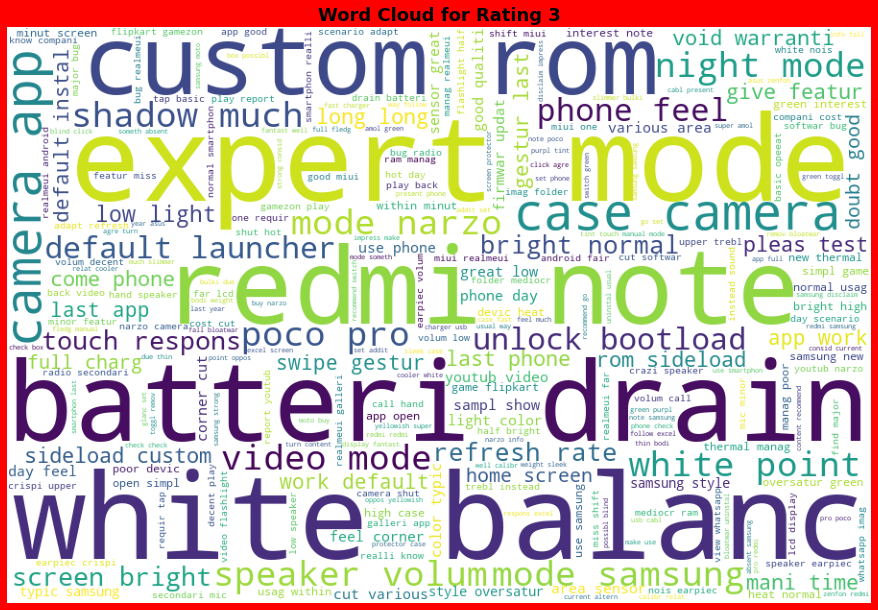

In [20]:
#Getting sense of words in Rating 3
one = df['Product_Review'][df['Ratings']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

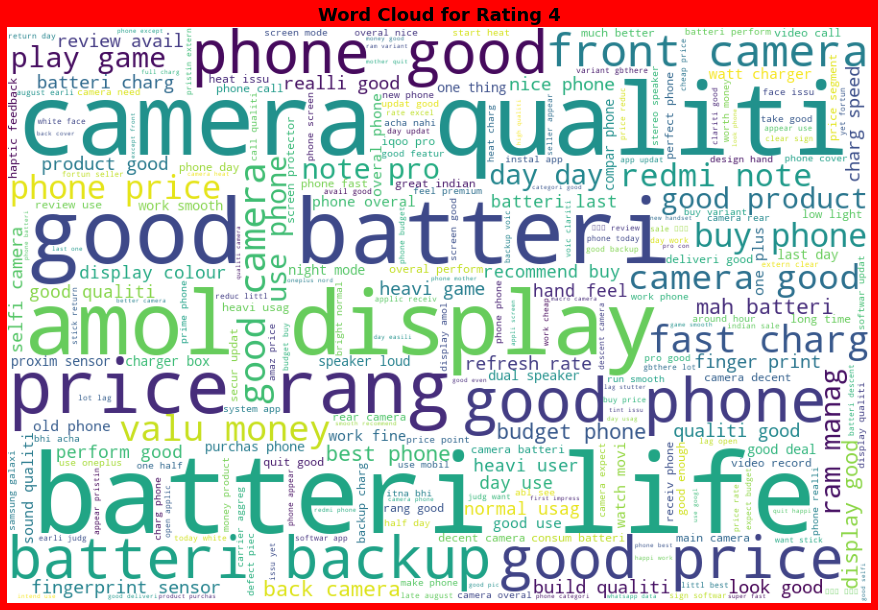

In [21]:
#Getting sense of words in Rating 4
one = df['Product_Review'][df['Ratings']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

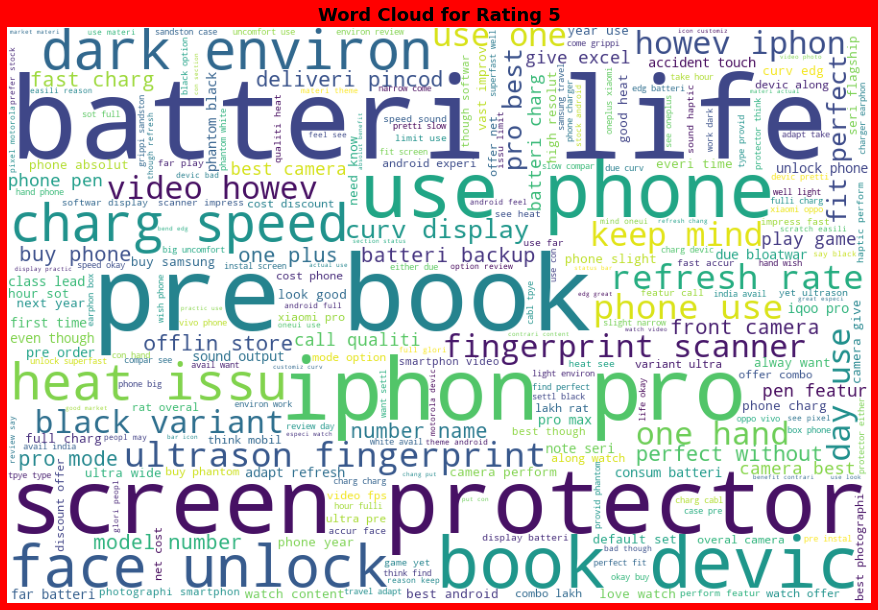

In [22]:
#Getting sense of words in Rating 5
one = df['Product_Review'][df['Ratings']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

In [23]:
tf = TfidfVectorizer()
features = tf.fit_transform(df['Product_Review'])
X=features
Y=df[['Ratings']]

### Finding the best random state

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    LRR = LogisticRegression()
    LRR.fit(X_train,Y_train)
    predLRR = LRR.predict(X_test)
    acc = accuracy_score(Y_test,predLRR)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')

Best Accuracy is 0.9793333333333333 on Random_state 156


### Train Test Split

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRs)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# Prediction
predLOR = LOR.predict(X_test)
print('R2 Score :',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR)) 

R2 Score : 0.6979908443540183
Mean Absolute Error(MAE) 0.021166666666666667
Mean Squared Error 0.022166666666666668
Root Mean Squared Error 0.14888474289418197
-----------------------------------------------------
0.9793333333333333
-----------------------------------------------------
[[  58   36    0]
 [   2 5534   12]
 [   3   71  284]]
-----------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.92      0.62      0.74        94
         4.0       0.98      1.00      0.99      5548
         5.0       0.96      0.79      0.87       358

    accuracy                           0.98      6000
   macro avg       0.95      0.80      0.87      6000
weighted avg       0.98      0.98      0.98      6000



In [27]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(LOR, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', LOR, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.89375 0.98375 0.98425 0.92875 0.9325 ]
Mean CV Score : 0.9446
Std deviation : 0.03489469873777389


###  RandomForest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.6979908443540183
Mean Absolute Error 0.021166666666666667
Mean Squared Error 0.022166666666666668
Root Mean Squared Error 0.14888474289418197
-----------------------------------------------------
Accuracy Score:  0.9793333333333333
-----------------------------------------------------
Confusion Matrix:
 [[  58   36    0]
 [   2 5534   12]
 [   3   71  284]]
-----------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.92      0.62      0.74        94
         4.0       0.98      1.00      0.99      5548
         5.0       0.96      0.79      0.87       358

    accuracy                           0.98      6000
   macro avg       0.95      0.80      0.87      6000
weighted avg       0.98      0.98      0.98      6000



In [37]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(RFC, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', RFC, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.895   0.98375 0.98425 0.942   0.9325 ]
Mean CV Score : 0.9475
Std deviation : 0.03369310018386553


### DecisionTree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

# [Prediction]
predDTC = DTC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predDTC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predDTC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predDTC)) 

R2 Score: 0.6979908443540183
Mean Absolute Error 0.021166666666666667
Mean Squared Error 0.022166666666666668
Root Mean Squared Error 0.14888474289418197
-----------------------------------------------------
Accuracy Score:  0.9793333333333333
-----------------------------------------------------
Confusion Matrix:
 [[  58   36    0]
 [   2 5534   12]
 [   3   71  284]]
-----------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.92      0.62      0.74        94
         4.0       0.98      1.00      0.99      5548
         5.0       0.96      0.79      0.87       358

    accuracy                           0.98      6000
   macro avg       0.95      0.80      0.87      6000
weighted avg       0.98      0.98      0.98      6000



In [38]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(DTC, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', DTC, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.845   0.97125 0.973   0.867   0.92   ]
Mean CV Score : 0.91525
Std deviation : 0.05245331257413586


### KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predKNN))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predKNN))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predKNN))

R2 Score: 0.6979908443540183
Mean Absolute Error 0.021166666666666667
Mean Squared Error 0.022166666666666668
Root Mean Squared Error 0.14888474289418197
-----------------------------------------------------
Accuracy Score:  0.9793333333333333
-----------------------------------------------------
Confusion Matrix:
 [[  58   36    0]
 [   2 5534   12]
 [   3   71  284]]
-----------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.92      0.62      0.74        94
         4.0       0.98      1.00      0.99      5548
         5.0       0.96      0.79      0.87       358

    accuracy                           0.98      6000
   macro avg       0.95      0.80      0.87      6000
weighted avg       0.98      0.98      0.98      6000



In [40]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(KNN, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', KNN, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score KNeighborsClassifier() :

CVScore : [0.895   0.98375 0.94525 0.9175  0.9325 ]
Mean CV Score : 0.9348000000000001
Std deviation : 0.029644308053992426


### AdaBoost Classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,Y_train)

# [Prediction]
predADA = ADA.predict(X_test)
print('R2 Score:',r2_score(Y_test,predADA))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predADA))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predADA))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predADA)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predADA))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predADA))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predADA))

R2 Score: 0.028120912658043618
Mean Absolute Error 0.07033333333333333
Mean Squared Error 0.07133333333333333
Root Mean Squared Error 0.26708300832013504
-----------------------------------------------------
Accuracy Score:  0.9301666666666667
-----------------------------------------------------
Confusion Matrix:
 [[  52   42    0]
 [  53 5460   35]
 [   3  286   69]]
-----------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.48      0.55      0.51        94
         4.0       0.94      0.98      0.96      5548
         5.0       0.66      0.19      0.30       358

    accuracy                           0.93      6000
   macro avg       0.70      0.58      0.59      6000
weighted avg       0.92      0.93      0.92      6000



In [42]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(ADA, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', ADA, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.84125 0.917   0.9515  0.9325  0.9325 ]
Mean CV Score : 0.9149499999999999
Std deviation : 0.03843904265197039


### GradientBoostingClassifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,Y_train)

# [Prediction]
predGBC = GBC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGBC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGBC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGBC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGBC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predGBC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predGBC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predGBC))

R2 Score: 0.6979908443540183
Mean Absolute Error 0.021166666666666667
Mean Squared Error 0.022166666666666668
Root Mean Squared Error 0.14888474289418197
-----------------------------------------------------
Accuracy Score:  0.9793333333333333
-----------------------------------------------------
Confusion Matrix:
 [[  58   36    0]
 [   2 5534   12]
 [   3   71  284]]
-----------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.92      0.62      0.74        94
         4.0       0.98      1.00      0.99      5548
         5.0       0.96      0.79      0.87       358

    accuracy                           0.98      6000
   macro avg       0.95      0.80      0.87      6000
weighted avg       0.98      0.98      0.98      6000



In [44]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(GBC, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', GBC, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.895   0.98375 0.973   0.9045  0.9325 ]
Mean CV Score : 0.93775
Std deviation : 0.035550668066859165


### Support Vector Machine

In [46]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc))

R2 Score: 0.6979908443540183
Mean Absolute Error 0.021166666666666667
Mean Squared Error 0.022166666666666668
Root Mean Squared Error 0.14888474289418197
-----------------------------------------------------
Accuracy Score:  0.9793333333333333
-----------------------------------------------------
Confusion Matrix:
 [[  58   36    0]
 [   2 5534   12]
 [   3   71  284]]
-----------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.92      0.62      0.74        94
         4.0       0.98      1.00      0.99      5548
         5.0       0.96      0.79      0.87       358

    accuracy                           0.98      6000
   macro avg       0.95      0.80      0.87      6000
weighted avg       0.98      0.98      0.98      6000



In [48]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(svc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', svc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score SVC() :

CVScore : [0.895   0.98375 0.98425 0.942   0.9325 ]
Mean CV Score : 0.9475
Std deviation : 0.03369310018386553


### ExtraTreesClassifier

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train,Y_train)

# [Prediction]
predETC = ETC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predETC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predETC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predETC))

R2 Score: 0.6979908443540183
Mean Absolute Error 0.021166666666666667
Mean Squared Error 0.022166666666666668
Root Mean Squared Error 0.14888474289418197
-----------------------------------------------------
Accuracy Score:  0.9793333333333333
-----------------------------------------------------
Confusion Matrix:
 [[  58   36    0]
 [   2 5534   12]
 [   3   71  284]]
-----------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.92      0.62      0.74        94
         4.0       0.98      1.00      0.99      5548
         5.0       0.96      0.79      0.87       358

    accuracy                           0.98      6000
   macro avg       0.95      0.80      0.87      6000
weighted avg       0.98      0.98      0.98      6000



In [50]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(ETC, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', ETC, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.8825  0.98375 0.98425 0.942   0.9325 ]
Mean CV Score : 0.945
Std deviation : 0.037719027028808694


### Cross Validation Score

In [52]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=3).mean())

# cv score for Decision Tree Classifier
print('Decision Tree Classifier',cross_val_score(DTC,X,Y,cv=3).mean())

# cv score for KNeighbors Classifier
print('KNeighbors Classifier',cross_val_score(KNN,X,Y,cv=3).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier',cross_val_score(ETC,X,Y,cv=3).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(ADA,X,Y,cv=3).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=3).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier',cross_val_score(GBC,X,Y,cv=3).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=3).mean())

Logistic Regression 0.9300002746637346
Decision Tree Classifier 0.9035008495599822
KNeighbors Classifier 0.9231006196464854
Extra Trees Classifier 0.9297502871631096
AdaBoosting Classifier: 0.8778022395009862
Random Forest Classifier 0.934250062174359
Gradient Boosting Classifier 0.9252505121518602
Support Vector  Classifier 0.9297502871631096


### Hyperparameter Tuning

In [53]:
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [54]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [55]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': 1,
 'random_state': 50}

In [56]:
Rating = RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=50, n_jobs=1, random_state=50)
Rating.fit(X_train, Y_train)
pred = Rating.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.9776666666666667


Confusion matrix of Random Forest Classifier : 
 [[  58   36    0]
 [   2 5535   11]
 [   3   82  273]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         3.0       0.92      0.62      0.74        94
         4.0       0.98      1.00      0.99      5548
         5.0       0.96      0.76      0.85       358

    accuracy                           0.98      6000
   macro avg       0.95      0.79      0.86      6000
weighted avg       0.98      0.98      0.98      6000



### Saving model

In [62]:
import joblib
joblib.dump(Rating,'Rating_Prediction.pkl')

['Rating_Prediction.pkl']